### Lec 7-1 ML의 실용, 팁
####  leaning rate 정하는 법- 특별한 답은 없고 0.01로 시작해서 값을 조정하면 적당한
#### 값을 탐색
#### nomalize data, zero-centered data 등으로 preprocessing이 필요
#### x'=x-M/분산
#### overfitting - 학습데이터에 딱맞는 모델을 만들면 실제 사용시 잘 맞지 않는 현상?
#### 데이터가 많으면 많을 수록 overfitting을 줄임, regularzation사용해서 줄임
#### 모델 모양을 구부리지 말고 펴지게 함 weight를 줄임(?)
#### tensorplow 구현시 l2reg라는 변수 사용


### Lec 7-1
#### 모델이 얼마나 훌룡한가? 를 평가하는 법
#### -> training set과 test set을 구분해서 사용하고 test set은 학습시 사용 x
#### test set으로 실제로 얼마나 잘 맞나 평가
#### 알파와 람다값을 조정할 필요가 있으면 training set을 training과 validation으로
#### 나누게됨
#### online learning - 한번에 너무 많은 데이터를 학습시키려 할때 나눠서 학습시킴
#### 95~99% 정확도면 좋은 모델

### Lab 1

In [3]:
import tensorflow as tf
tf.set_random_seed(777) 

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]
X = tf.placeholder("float", [None, 3]) # placeholder를 통해 training, test나눔
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# learning rate 설정 -> 너무 크면 발산, 너무 작으면 local dilemma

prediction = tf.arg_max(hypothesis, 1) # 예측
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
   sess.run(tf.global_variables_initializer())
   for step in range(201):
       cost_val, W_val, _ = sess.run([cost, W, optimizer], 
                       feed_dict={X: x_data, Y: y_data})
       print(step, cost_val, W_val)
    # test set사용해서 평가
   print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
   print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 3.1290576 [[-1.2895828   0.9119962   1.651022  ]
 [ 0.4556617   0.08549981 -0.29683048]
 [ 1.1107783   1.3890737  -0.06849846]]
1 1.8079677 [[-1.3131317   0.9008589   1.6857082 ]
 [ 0.385736    0.06151982 -0.20292476]
 [ 1.0551319   1.3606158   0.0156058 ]]
2 1.5387187 [[-1.3278095   0.88253117  1.7187136 ]
 [ 0.35994962 -0.00266764 -0.11295092]
 [ 1.0415611   1.2925256   0.09726681]]
3 1.2931585 [[-1.3508314   0.875025    1.7492418 ]
 [ 0.2870541  -0.01355356 -0.02916946]
 [ 0.9804964   1.276221    0.17463623]]
4 1.0826633 [[-1.3609421   0.8580373   1.7763402 ]
 [ 0.27863556 -0.07935654  0.04505207]
 [ 0.9812247   1.2054399   0.24468902]]
5 0.92299914 [[-1.3815151   0.8563379   1.7986127 ]
 [ 0.20991552 -0.06935525  0.10377079]
 [ 0.92106986  1.2092259   0.3010579 ]]
6 0.8290444 [[-1.3854935   0.8438701   1.8150588 ]
 [ 0.22736195 -0.12244396  0.13941309]
 [ 0.9441987   1.1505294   0.33662555]]
7 0.79589033 [[-1.4003322   0.8480091   1.8257586 ]
 [ 0.18352453 -0.09008335  0.1508899 

#### NaN - non-normailized inputs 했을때 발생

In [7]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

# nomailize x
for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
# nomalize 했을때  
xy = MinMaxScaler(xy)
print(xy)

0 Cost:  3286798700000.0 
Prediction:
 [[-1278151. ]
 [-2573456.2]
 [-2024362. ]
 [-1418951. ]
 [-1672377.9]
 [-1686459.4]
 [-1545668.1]
 [-1968053.6]]
1 Cost:  3.611142e+27 
Prediction:
 [[4.2389041e+13]
 [8.5333484e+13]
 [6.7128774e+13]
 [4.7056912e+13]
 [5.5459088e+13]
 [5.5925876e+13]
 [5.1258002e+13]
 [6.5261621e+13]]
2 Cost:  inf 
Prediction:
 [[-1.4050420e+21]
 [-2.8284936e+21]
 [-2.2250739e+21]
 [-1.5597650e+21]
 [-1.8382663e+21]
 [-1.8537387e+21]
 [-1.6990158e+21]
 [-2.1631846e+21]]
3 Cost:  inf 
Prediction:
 [[4.6572016e+28]
 [9.3754247e+28]
 [7.3753079e+28]
 [5.1700515e+28]
 [6.0931821e+28]
 [6.1444670e+28]
 [5.6316166e+28]
 [7.1701674e+28]]
4 Cost:  inf 
Prediction:
 [[-1.5436925e+36]
 [-3.1076115e+36]
 [-2.4446455e+36]
 [-1.7136834e+36]
 [-2.0196677e+36]
 [-2.0366667e+36]
 [-1.8666756e+36]
 [-2.3766490e+36]]
5 Cost:  inf 
Prediction:
 [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

### Lab 2

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 3.144801644
Epoch: 0002 cost = 1.122395613
Epoch: 0003 cost = 0.878235579
Epoch: 0004 cost = 0.761424967
Epoch: 0005 cost = 0.690545581
Epoch: 0006 cost = 0.641129860
Epoch: 0007 cost = 0.603962244
Epoch: 0008 cost = 0.575177942
Epoch: 0009 cost = 0.551365742
Epoch: 0010 cost = 0.531249742
Epoch: 0011 cost = 0.514629601
Epoch: 0012 cost = 0.499557519
Epoch: 0013 cost = 0.486708446
Epoch: 0014 cost = 0.475541684
Epoch: 0015 cost = 0.464533331
Learning finished
Accuracy:  0.8892
Label:  [7]
Prediction:  [7]


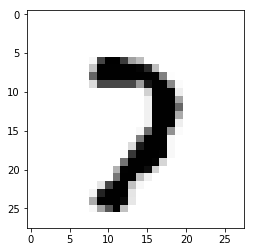

In [13]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777) 

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])

Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes])) # shape
b = tf.Variable(tf.random_normal([nb_classes])) # 10개

# softmax 사용
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
#test mddel
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15 # epoch 전체 데이터 set을 한번 학습시키는 것이 1epoch
batch_size = 100 # 한번에 100개씩 학습

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
            
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

